<Figure size 432x288 with 0 Axes>

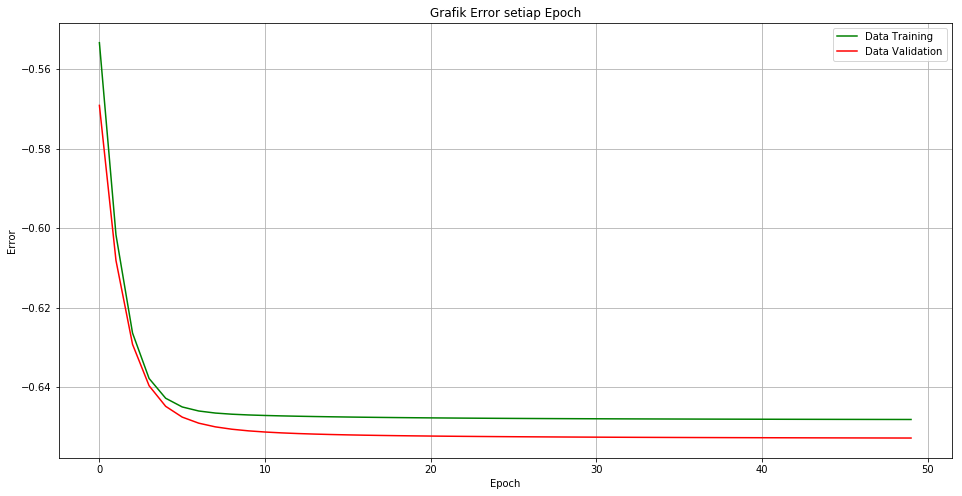

In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#read data
datairis = pd.read_csv('iris_tomi.csv', delimiter = ',')
datairis = shuffle(datairis)

#definisi fungsi 
def sigmoid(x):
    sigmoid = 1/(1 + np.exp(-1*x))
    return sigmoid
    
def htetha(tetha,b, X):
    ht = np.zeros(1)
    ht = (np.dot(np.transpose(tetha), X) - b )
    return ht

def predict(activ):
    if(activ) < 0.5:
        return 0
    else:
        return 1

def mse(err):
    return ((np.dot(err, np.transpose(err)))/len(err))

def confusion_matrix(fact, predict):
    true = 0
    total = len(fact)
    for i in range(len(fact)):
        if fact[i] == predict[i]: 
            true = true + 1
    
    return true/total

def klasifikasi(output1, output2, fact):
    if(output1 == 0 and output2 == 0):
        ypredic = 0
    elif (output1 == 1 and output2 == 0):
        ypredic = 1
    elif (output1 == 0 and output2 == 1):
        ypredic = 2
    else:
        ypredic = None
    
    return ypredic

x_train = np.vstack([datairis.iloc[0:40,:4].values,datairis.iloc[50:90,:4].values, datairis.iloc[100:40,:4].values])
Y_train = np.vstack([datairis.iloc[0:40,5:8].values,datairis.iloc[50:90,5:8].values, datairis.iloc[100:40,5:8].values])
x_valid = np.vstack([datairis.iloc[40:50,:4].values,datairis.iloc[90:100,:4].values, datairis.iloc[100:110,:4].values])
Y_valid = np.vstack([datairis.iloc[40:50,5:8].values,datairis.iloc[90:100,5:8].values, datairis.iloc[100:110,5:8].values])

epoch = 50
alpha = 0.1
layers = 2
numoutput = 2
ht = np.zeros((2,2))
out = np.zeros((2,2))
neurons = [2,2]
errori = np.zeros(2)
trainerror = np.zeros(epoch)
validerror = np.zeros(epoch)

trainaccuracy = np.zeros(epoch)
validaccuracy = np.zeros(epoch)
  
jumtrain = len(Y_train)
jumvalid = len(Y_valid)
prediction = np.zeros(jumtrain)
predictionvalid = np.zeros(jumvalid)
    
newtheta = np.array([[[0.3, 0.3, 0.3, 0.3],[0.3, 0.3, 0.3, 0.3]], [[0.3, 0.2], [0.4, 0.5]]])
newbias = np.array([[0.2,0.2], [0.2,0.2]])

for n in range(epoch):

    localerror = 0.0000

     
    for i in range(jumtrain):

        tethas = newtheta.copy()
        bias = newbias.copy()

        # forward pass
        for layer in range(layers):

            for neuron in range(neurons[layer]):

                tetha1 = tethas[layer,neuron]
                bias1 = bias[layer,neuron]

                if (layer == 0):
                    ht[layer, neuron] = htetha(tetha1, bias1, x_train[i])
                else:
                    ht[layer, neuron] = htetha(tetha1, bias1, out[layer-1])

                out[layer, neuron] = sigmoid(ht[layer, neuron])
                if( layer == 1):
                    prediction[i] = klasifikasi(out[layer,0] , out[layer,1], Y_train[i,2])
                
                


        for err in range(numoutput):
            errori[err] = (out[1,err] - Y_train[i, err])

        deltatheta = np.array([[[1, 1, 1, 1],[1, 1, 1, 1]], [[1,1], [1,1]]])
        deltabias = np.zeros((2,2))

            #backward pass
        for layer in range(layers-1, -1, -1):

            for k in range(neurons[layer]-1, -1, -1):

                    #hidden layer
                if (layer != 0):   
                    deltabias[layer][k] = (errori[k]*out[layer,k]* (1-out[layer,k]))

                    for j in range(neurons[layer-1]-1, -1, -1):                
                        deltatheta[layer][k][j] = (deltabias[layer][k]*out[layer-1][j])

                        newtheta[layer][k][j] = (tethas[layer][k][j] - (alpha* deltatheta[layer][k][j]))


                else:
                    deltabias[layer][k] = ((deltabias[layer+1][0]*tethas[layer+1][0][k]+deltabias[layer+1][1]*tethas[layer+1][1][k])* out[layer][k]*(1-out[layer][k]))
                    for j in range(len(x_train[i,:])-1, -1, -1):
                        deltatheta[layer][k][j] = (deltabias[layer][k]* x_train[i,j])
                        newtheta[layer][k][j] = (tethas[layer][k][j] - (alpha* deltatheta[layer][k][j]))

                    #update weights
                newbias[layer][k] = bias[layer][k] - (alpha*deltabias[layer][k])

        localerror += mse(errori)
        

    trainerror[n] += (localerror/jumtrain)
    trainerror[n] = math.log10(trainerror[n])
    trainaccuracy[n]= (confusion_matrix(Y_train[:,2], prediction))
    

    localerror = 0.0000

        #validasi
        
    for j in range(jumvalid):

        tethas = newtheta.copy()
        bias = newbias.copy()

        for layer in range(layers):

            for neuron in range(neurons[layer]):

                tetha1 = tethas[layer,neuron]
                bias1 = bias[layer,neuron]

                if (layer == 0):
                    ht[layer, neuron] = htetha(tetha1, bias1, x_valid[j,:])
                else:
                    ht[layer, neuron] = htetha(tetha1, bias1, out[layer-1])

                out[layer, neuron] = sigmoid(ht[layer, neuron])
                if( layer == 1):
                    predictionvalid[j] = klasifikasi(out[layer,0] , out[layer,1], Y_valid[j,2])

        for idx in range(numoutput):
            errori[idx] = (out[1,idx] - Y_valid[j, idx])

        localerror += mse(errori)

    validerror[n] += ((localerror/jumvalid))
    validerror[n] = math.log10(validerror[n])
    validaccuracy[n] = (confusion_matrix(Y_valid[:,2], predictionvalid))
    


plt.clf()
x = np.arange(epoch)
y1 = trainerror.copy()
y2 = validerror.copy()


plt.figure(figsize=(16,8))
plt.plot(x,y1, color="green")
plt.plot(x,y2, color="red")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Grafik Error setiap Epoch")
plt.legend(["Data Training", "Data Validation"])
plt.grid()
plt.show()
